In [ ]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 47.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pybaseball as pyb
from datetime import date
import statsmodels.api as sm

In [ ]:
torpedo_users = [
    "Rutschman, Adley",
    "De La Cruz, Elly",
    "Trevino, Jose",
    "Swanson, Dansby",
    "Hoerner, Nico",
    "Jeffers, Ryan",
    "Lindor, Francisco",
    "Volpe, Anthony",
    "Wells, Austin",
    "Bellinger, Cody",
    "Chisholm, Jazz",
    "Goldschmidt, Paul",
    "Bohm, Alec",
    "Cruz, Oneil",
    "Schneider, Davis",
    "Caminero, Junior"
]

In [ ]:
# List to store results
results = []

# Loop through each player
for player in torpedo_users:
    # Split the name into last and first
    last_name, first_name = player.split(", ")
    # Look up the player ID
    result = pyb.playerid_lookup(last_name, first_name)
    mlbam_id = result['key_mlbam'].iloc[0]  # Get the first ID
    results.append({"Name": player, "MLBAM_ID": mlbam_id})

# Convert results to DataFrame
player_df = pd.DataFrame(results)

# Ensure MLBAM_ID is numeric (convert None to NaN for merging)
player_df['MLBAM_ID'] = pd.to_numeric(player_df['MLBAM_ID'], errors='coerce')

print(player_df)

Gathering player lookup table. This may take a moment.
                 Name  MLBAM_ID
0    Rutschman, Adley    668939
1    De La Cruz, Elly    682829
2       Trevino, Jose    624431
3     Swanson, Dansby    621020
4       Hoerner, Nico    663538
5       Jeffers, Ryan    680777
6   Lindor, Francisco    596019
7      Volpe, Anthony    683011
8       Wells, Austin    669224
9     Bellinger, Cody    641355
10     Chisholm, Jazz    665862
11  Goldschmidt, Paul    502671
12         Bohm, Alec    664761
13        Cruz, Oneil    665833
14   Schneider, Davis    676914
15   Caminero, Junior    691406


In [ ]:
# Import csvs from drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import csvs
swings_2024 = pd.read_csv('/content/drive/MyDrive/2024_bat_tracking.csv')
swings_2025 = pd.read_csv('/content/drive/MyDrive/2025_bat_tracking.csv')

In [ ]:
swings_2024.head()

,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing
0,519317,"Stanton, Giancarlo",715,0.913155,485,81.224576,0.986014,0.298969,0.202797,0.276289,0.187413,8.564391,14,0.272394,230,0.321678,252,0.352448
1,665833,"Cruz, Oneil",876,0.912500,590,78.564222,0.755708,0.340678,0.229452,0.245763,0.165525,7.664186,9,-9.782320,286,0.326484,304,0.347032
2,678877,"Noel, Jhonkensy",348,0.896907,242,77.990895,0.770115,0.202479,0.140805,0.136364,0.094828,7.739997,1,-1.089794,106,0.304598,107,0.307471
3,672744,"Canario, Alexander",40,0.909091,24,77.986632,0.825000,0.291667,0.175000,0.208333,0.125000,7.980210,2,0.026027,16,0.400000,12,0.300000
4,694175,"León, Pedro",38,0.926829,22,77.833039,0.789474,0.272727,0.157895,0.181818,0.105263,7.991438,0,-3.792992,16,0.421053,9,0.236842


In [ ]:
# Merge tables. only want data from swings_2024 where MLBAM_ID is equal to id, add 24_ prefix to cols
merged_24 = pd.merge(swings_2024, player_df, left_on='id', right_on='MLBAM_ID', how='inner')
merged_24


,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing,Name,MLBAM_ID
0,665833,"Cruz, Oneil",876,0.912500,590,78.564222,0.755708,0.340678,0.229452,0.245763,0.165525,7.664186,9,-9.782320,286,0.326484,304,0.347032,"Cruz, Oneil",665833
1,691406,"Caminero, Junior",264,0.904110,191,77.236120,0.700758,0.335079,0.242424,0.230366,0.166667,8.335880,14,-3.695856,73,0.276515,120,0.454545,"Caminero, Junior",691406
2,682829,"De La Cruz, Elly",989,0.905678,691,75.184269,0.538928,0.316932,0.221436,0.189580,0.132457,7.281976,31,2.832530,298,0.301314,350,0.353893,"De La Cruz, Elly",682829
3,680777,"Jeffers, Ryan",751,0.900480,592,72.880538,0.340879,0.273649,0.215712,0.133446,0.105193,7.466496,23,-3.018126,159,0.211718,297,0.395473,"Jeffers, Ryan",680777
4,502671,"Goldschmidt, Paul",1111,0.909165,824,72.484165,0.243024,0.334951,0.248425,0.179612,0.133213,7.750874,10,-10.890342,287,0.258326,388,0.349235,"Goldschmidt, Paul",502671
5,596019,"Lindor, Francisco",1116,0.910277,857,72.428488,0.235663,0.373396,0.286738,0.182030,0.139785,7.565375,13,-6.786468,259,0.232079,439,0.393369,"Lindor, Francisco",596019
6,669224,"Wells, Austin",686,0.903821,510,72.426271,0.217201,0.313725,0.233236,0.162745,0.120991,7.404604,11,-16.530325,176,0.256560,244,0.355685,"Wells, Austin",669224
7,664761,"Bohm, Alec",891,0.905488,741,72.241153,0.216611,0.391363,0.325477,0.187584,0.156004,7.391298,9,-4.290347,150,0.168350,415,0.465769,"Bohm, Alec",664761
8,665862,"Chisholm Jr., Jazz",924,0.909449,650,71.947800,0.232684,0.324615,0.228355,0.150769,0.106061,7.493208,11,-16.103415,274,0.296537,313,0.338745,"Chisholm, Jazz",665862
9,621020,"Swanson, Dansby",991,0.904197,725,71.734416,0.128153,0.333793,0.244198,0.154483,0.113017,7.440274,22,-23.031171,266,0.268416,354,0.357215,"Swanson, Dansby",621020


In [ ]:
drop_cols = ['Name', 'MLBAM_ID', 'swords', 'batter_run_value','swings_competitive',
        'percent_swings_competitive', 'whiffs', 'blast_per_swing', 'batted_ball_events',
        'blast_per_bat_contact', 'contact', 'batted_ball_event_per_swing',
        'squared_up_per_swing','hard_swing_rate']

merged_24 = merged_24.drop(drop_cols, axis=1)

In [ ]:
merged_24

,id,name,avg_bat_speed,squared_up_per_bat_contact,swing_length,whiff_per_swing
0,665833,"Cruz, Oneil",78.564222,0.340678,7.664186,0.326484
1,691406,"Caminero, Junior",77.236120,0.335079,8.335880,0.276515
2,682829,"De La Cruz, Elly",75.184269,0.316932,7.281976,0.301314
3,680777,"Jeffers, Ryan",72.880538,0.273649,7.466496,0.211718
4,502671,"Goldschmidt, Paul",72.484165,0.334951,7.750874,0.258326
5,596019,"Lindor, Francisco",72.428488,0.373396,7.565375,0.232079
6,669224,"Wells, Austin",72.426271,0.313725,7.404604,0.256560
7,664761,"Bohm, Alec",72.241153,0.391363,7.391298,0.168350
8,665862,"Chisholm Jr., Jazz",71.947800,0.324615,7.493208,0.296537
9,621020,"Swanson, Dansby",71.734416,0.333793,7.440274,0.268416


In [ ]:
# add _24 suffix to all cols except id and name
merged_24.columns = [col + '_24' if col not in ['id', 'name'] else col for col in merged_24.columns]
merged_24

,id,name,avg_bat_speed_24,squared_up_per_bat_contact_24,swing_length_24,whiff_per_swing_24
0,665833,"Cruz, Oneil",78.564222,0.340678,7.664186,0.326484
1,691406,"Caminero, Junior",77.236120,0.335079,8.335880,0.276515
2,682829,"De La Cruz, Elly",75.184269,0.316932,7.281976,0.301314
3,680777,"Jeffers, Ryan",72.880538,0.273649,7.466496,0.211718
4,502671,"Goldschmidt, Paul",72.484165,0.334951,7.750874,0.258326
5,596019,"Lindor, Francisco",72.428488,0.373396,7.565375,0.232079
6,669224,"Wells, Austin",72.426271,0.313725,7.404604,0.256560
7,664761,"Bohm, Alec",72.241153,0.391363,7.391298,0.168350
8,665862,"Chisholm Jr., Jazz",71.947800,0.324615,7.493208,0.296537
9,621020,"Swanson, Dansby",71.734416,0.333793,7.440274,0.268416


In [ ]:
swings_2025.head()

,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing
0,691406,"Caminero, Junior",33,0.868421,29,79.914381,0.939394,0.172414,0.151515,0.137931,0.121212,8.332153,1,-0.197019,4,0.121212,17,0.515152
1,665833,"Cruz, Oneil",39,0.886364,29,79.584492,0.820513,0.344828,0.256410,0.275862,0.205128,7.658195,2,0.512539,10,0.256410,17,0.435897
2,691023,"Walker, Jordan",51,0.962264,36,78.607884,0.862745,0.222222,0.156863,0.138889,0.098039,7.934957,0,0.825234,15,0.294118,14,0.274510
3,656180,"Adams, Riley",4,1.000000,4,78.531065,0.750000,0.250000,0.250000,0.250000,0.250000,7.931843,0,-0.498276,0,0.000000,2,0.500000
4,678877,"Noel, Jhonkensy",19,1.000000,14,77.835753,0.684211,0.214286,0.157895,0.214286,0.157895,7.373239,0,-2.077177,5,0.263158,9,0.473684


In [ ]:
merged_25 = pd.merge(swings_2025, player_df, left_on='id', right_on='MLBAM_ID', how='inner')
merged_25

,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing,Name,MLBAM_ID
0,691406,"Caminero, Junior",33,0.868421,29,79.914381,0.939394,0.172414,0.151515,0.137931,0.121212,8.332153,1,-0.197019,4,0.121212,17,0.515152,"Caminero, Junior",691406
1,665833,"Cruz, Oneil",39,0.886364,29,79.584492,0.820513,0.344828,0.256410,0.275862,0.205128,7.658195,2,0.512539,10,0.256410,17,0.435897,"Cruz, Oneil",665833
2,682829,"De La Cruz, Elly",36,0.923077,24,75.943246,0.666667,0.541667,0.361111,0.416667,0.277778,7.160374,1,1.673155,12,0.333333,18,0.500000,"De La Cruz, Elly",682829
3,669224,"Wells, Austin",35,0.853659,24,73.938822,0.400000,0.291667,0.200000,0.208333,0.142857,7.766345,0,1.593062,11,0.314286,11,0.314286,"Wells, Austin",669224
4,664761,"Bohm, Alec",32,0.888889,28,73.498718,0.375000,0.535714,0.468750,0.464286,0.406250,7.580875,1,-1.232503,4,0.125000,18,0.562500,"Bohm, Alec",664761
5,665862,"Chisholm Jr., Jazz",41,0.891304,24,73.238202,0.341463,0.333333,0.195122,0.166667,0.097561,7.731162,0,1.950744,17,0.414634,10,0.243902,"Chisholm, Jazz",665862
6,502671,"Goldschmidt, Paul",34,0.918919,27,72.102406,0.088235,0.370370,0.294118,0.148148,0.117647,7.794827,1,-1.199904,7,0.205882,13,0.382353,"Goldschmidt, Paul",502671
7,680777,"Jeffers, Ryan",29,0.906250,24,71.768872,0.137931,0.291667,0.241379,0.166667,0.137931,7.356856,0,-1.016710,5,0.172414,13,0.448276,"Jeffers, Ryan",680777
8,641355,"Bellinger, Cody",44,0.897959,35,71.586223,0.090909,0.257143,0.204545,0.171429,0.136364,7.864234,2,-1.355867,9,0.204545,14,0.318182,"Bellinger, Cody",641355
9,683011,"Volpe, Anthony",36,0.947368,28,71.117733,0.166667,0.285714,0.222222,0.142857,0.111111,7.261441,0,2.242329,8,0.222222,14,0.388889,"Volpe, Anthony",683011


In [ ]:
# Drop cols
merged_25 = merged_25.drop(drop_cols, axis=1)
merged_25

,id,name,avg_bat_speed,squared_up_per_bat_contact,swing_length,whiff_per_swing
0,691406,"Caminero, Junior",79.914381,0.172414,8.332153,0.121212
1,665833,"Cruz, Oneil",79.584492,0.344828,7.658195,0.256410
2,682829,"De La Cruz, Elly",75.943246,0.541667,7.160374,0.333333
3,669224,"Wells, Austin",73.938822,0.291667,7.766345,0.314286
4,664761,"Bohm, Alec",73.498718,0.535714,7.580875,0.125000
5,665862,"Chisholm Jr., Jazz",73.238202,0.333333,7.731162,0.414634
6,502671,"Goldschmidt, Paul",72.102406,0.370370,7.794827,0.205882
7,680777,"Jeffers, Ryan",71.768872,0.291667,7.356856,0.172414
8,641355,"Bellinger, Cody",71.586223,0.257143,7.864234,0.204545
9,683011,"Volpe, Anthony",71.117733,0.285714,7.261441,0.222222


In [ ]:
# add _25 suffix to all cols except id and name
merged_25.columns = [col + '_25' if col not in ['id', 'name'] else col for col in merged_25.columns]
merged_25

,id,name,avg_bat_speed_25,squared_up_per_bat_contact_25,swing_length_25,whiff_per_swing_25
0,691406,"Caminero, Junior",79.914381,0.172414,8.332153,0.121212
1,665833,"Cruz, Oneil",79.584492,0.344828,7.658195,0.256410
2,682829,"De La Cruz, Elly",75.943246,0.541667,7.160374,0.333333
3,669224,"Wells, Austin",73.938822,0.291667,7.766345,0.314286
4,664761,"Bohm, Alec",73.498718,0.535714,7.580875,0.125000
5,665862,"Chisholm Jr., Jazz",73.238202,0.333333,7.731162,0.414634
6,502671,"Goldschmidt, Paul",72.102406,0.370370,7.794827,0.205882
7,680777,"Jeffers, Ryan",71.768872,0.291667,7.356856,0.172414
8,641355,"Bellinger, Cody",71.586223,0.257143,7.864234,0.204545
9,683011,"Volpe, Anthony",71.117733,0.285714,7.261441,0.222222


In [ ]:
# Merge df together
df = pd.merge(merged_24, merged_25, on=['id', 'name'], how='outer')

In [ ]:
df

,id,name,avg_bat_speed_24,squared_up_per_bat_contact_24,swing_length_24,whiff_per_swing_24,avg_bat_speed_25,squared_up_per_bat_contact_25,swing_length_25,whiff_per_swing_25
0,502671,"Goldschmidt, Paul",72.484165,0.334951,7.750874,0.258326,72.102406,0.370370,7.794827,0.205882
1,596019,"Lindor, Francisco",72.428488,0.373396,7.565375,0.232079,71.086578,0.343750,7.571089,0.200000
2,621020,"Swanson, Dansby",71.734416,0.333793,7.440274,0.268416,71.014587,0.409091,7.452053,0.228070
3,624431,"Trevino, Jose",68.896210,0.410569,7.035212,0.171717,67.701246,0.285714,7.079683,0.125000
4,641355,"Bellinger, Cody",68.973726,0.385593,7.611819,0.205387,71.586223,0.257143,7.864234,0.204545
5,663538,"Hoerner, Nico",68.216665,0.353702,7.132460,0.104211,66.900726,0.270270,7.078633,0.075000
6,664761,"Bohm, Alec",72.241153,0.391363,7.391298,0.168350,73.498718,0.535714,7.580875,0.125000
7,665833,"Cruz, Oneil",78.564222,0.340678,7.664186,0.326484,79.584492,0.344828,7.658195,0.256410
8,665862,"Chisholm Jr., Jazz",71.947800,0.324615,7.493208,0.296537,73.238202,0.333333,7.731162,0.414634
9,668939,"Rutschman, Adley",69.074866,0.356711,6.939966,0.157841,69.898618,0.461538,6.750899,0.133333


# Analysis

In [ ]:
df.describe()

,id,avg_bat_speed_24,squared_up_per_bat_contact_24,swing_length_24,whiff_per_swing_24,avg_bat_speed_25,squared_up_per_bat_contact_25,swing_length_25,whiff_per_swing_25
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,649911.875000,71.964175,0.341784,7.406989,0.232130,72.228413,0.320486,7.400298,0.233440
std,47168.648663,3.008300,0.035570,0.357633,0.060531,4.074078,0.134396,0.492464,0.115030
min,502671.000000,68.216665,0.273649,6.922220,0.104211,64.975246,0.000000,6.226579,0.074074
25%,637124.000000,69.250877,0.321032,7.118337,0.196970,70.761842,0.258152,7.137010,0.151099
50%,665847.500000,72.094477,0.335015,7.422439,0.244319,71.569781,0.319805,7.490439,0.211538
75%,677879.750000,72.583259,0.360882,7.576986,0.270589,73.764548,0.404167,7.709783,0.316092
max,691406.000000,78.564222,0.410569,8.335880,0.326484,80.339939,0.541667,8.263989,0.500000


For every inch of increased swing length, average bat speed increases by 0.35 mph.
R-squared: 0.3575


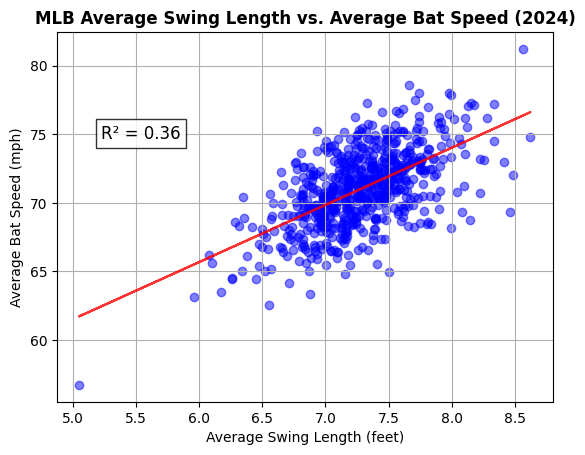

In [ ]:
# Linear regression between swing length and avg bat speed in swings_2024
from sklearn.linear_model import LinearRegression

# Assuming swings_2024 is your DataFrame with columns 'swing_length_24' and 'avg_bat_speed_24'
# Drop any rows with missing values
swings_2024_clean = swings_2024[['swing_length', 'avg_bat_speed']].dropna()

# Prepare data for linear regression
X = swings_2024_clean[['swing_length']]  # Independent variable (2D array required by sklearn)
y = swings_2024_clean['avg_bat_speed']   # Dependent variable

# Fit linear regression model
model = LinearRegression().fit(X, y)

# Get the slope (change in mph per unit of swing length) and intercept
slope = model.coef_[0]  # This is the increase in avg_bat_speed per unit of swing_length
intercept = model.intercept_

# Calculate R-squared to assess fit
r_squared = model.score(X, y)

# Print the result
print(f"For every inch of increased swing length, average bat speed increases by {slope/12:.2f} mph.")
print(f"R-squared: {r_squared:.4f}")

# Plot the data and regression line
plt.scatter(swings_2024_clean['swing_length'], swings_2024_clean['avg_bat_speed'], color='blue', alpha=.5)
plt.plot(swings_2024_clean['swing_length'], model.predict(X), color='red', alpha=.8)
plt.xlabel('Average Swing Length (feet)')
plt.ylabel('Average Bat Speed (mph)')
plt.title('MLB Average Swing Length vs. Average Bat Speed (2024)', weight='bold')
plt.grid(True)
plt.text(0.25, 0.75, f"R² = {r_squared:.2f}", transform=plt.gca().transAxes,
         fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))
plt.show()


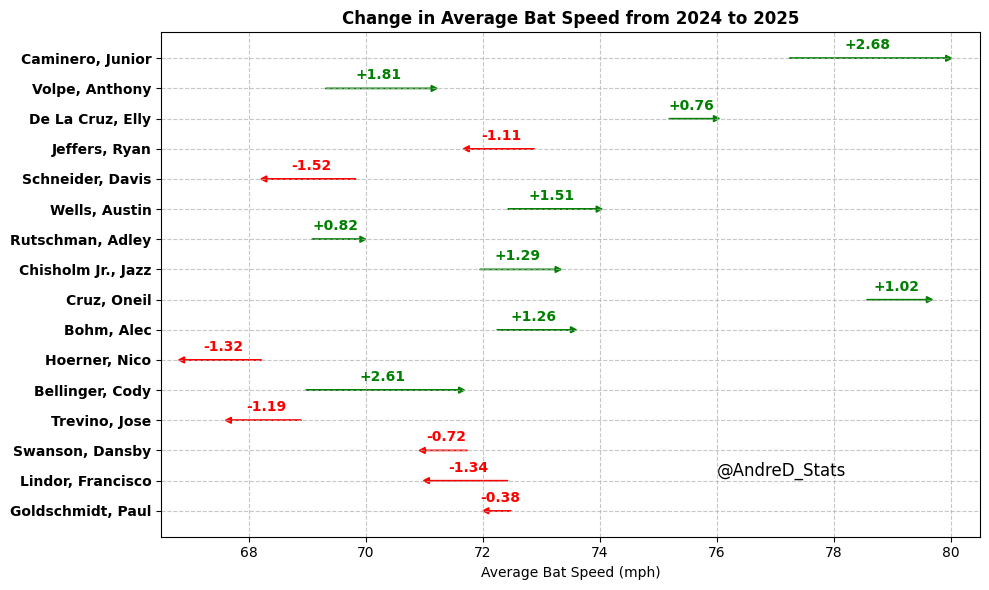

In [ ]:
#Set up the plot
plt.figure(figsize=(10, 6))  # Adjust size for readability

# Get unique players for Y-axis
players = df['name'].tolist()

# Plot lines and dots for each player with color based on change
for i, row in df.iterrows():
    # Calculate the change in bat speed
    change = row['avg_bat_speed_25'] - row['avg_bat_speed_24']

    # Choose color based on change (green for increase, red for decrease)
    color = 'green' if change > 0 else 'red'

    # Plot the line with dots
    plt.arrow(row['avg_bat_speed_24'], players.index(row['name']),
              row['avg_bat_speed_25'] - row['avg_bat_speed_24'], 0,
              head_width=0.2, head_length=0.1, fc=color, ec=color)

    # Add change value above the line (centered)
    plt.text((row['avg_bat_speed_24'] + row['avg_bat_speed_25']) / 2,
             players.index(row['name']) + 0.2,
             f"{change:+.2f}",
             fontsize=10, weight='bold', ha='center', va='bottom', color=color)

# Customize the plot
plt.yticks(range(len(players)), players, weight='bold')  # Set Y-axis ticks to player names
plt.xlabel('Average Bat Speed (mph)')
plt.title('Change in Average Bat Speed from 2024 to 2025', weight = 'bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.text(76,1.15,'@AndreD_Stats',size=12)

# Set X-axis limits based on data range (adjust if needed)
plt.xlim(66.5,80.5)

# Adjust layout to prevent cutoff
plt.tight_layout()

# Show the plot
plt.show()

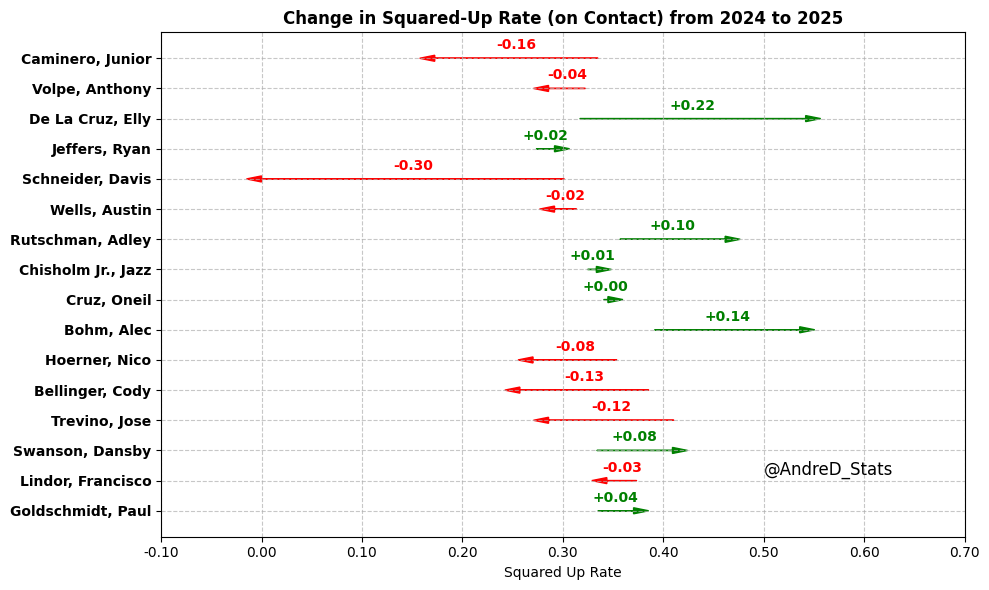

In [ ]:
from matplotlib.ticker import FormatStrFormatter

#Set up the plot
plt.figure(figsize=(10, 6))  # Adjust size for readability

# Get unique players for Y-axis
players = df['name'].tolist()

# Plot lines and dots for each player with color based on change
for i, row in df.iterrows():
    # Calculate the change in bat speed
    change = row['squared_up_per_bat_contact_25'] - row['squared_up_per_bat_contact_24']

    # Choose color based on change (green for increase, red for decrease)
    color = 'green' if change > 0 else 'red'

    # Plot the line with dots
    plt.arrow(row['squared_up_per_bat_contact_24'], players.index(row['name']),
              row['squared_up_per_bat_contact_25'] - row['squared_up_per_bat_contact_24'], 0,
              head_width=0.2, head_length=0.015, fc=color, ec=color)

    # Add change value above the line (centered)
    plt.text((row['squared_up_per_bat_contact_24'] + row['squared_up_per_bat_contact_25']) / 2,
             players.index(row['name']) + 0.2,
             f"{change:+.2f}",
             fontsize=10, weight='bold', ha='center', va='bottom', color=color)

# Customize the plot
plt.yticks(range(len(players)), players, weight='bold')  # Set Y-axis ticks to player names
plt.xlabel('Squared Up Rate')
plt.title('Change in Squared-Up Rate (on Contact) from 2024 to 2025', weight = 'bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.text(.5,1.2,'@AndreD_Stats',size=12)

# Set X-axis limits based on data range (adjust if needed)
plt.xlim(-.1,.7)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Adjust layout to prevent cutoff
plt.tight_layout()

# Show the plot
plt.show()